In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

### Running PCSE/WOFOST with custom input data

In [2]:
data_dir = './pcse_examples/'

In [3]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'sug0601.crop')
cropdata = CABOFileReader(cropfile)
print(cropdata)

** $Id: sug0601.cab 1.3 1997/09/25 14:07:02 LEM release $
** File SUG0601.CAB
** CROP DATA FILE for use with WOFOST Version 5.4, June 1992
**
** SUGAR BEET 601
** Regions : Germany, Northern and Central France, Netherlands, Belgium,
**           Luxembourg, UK, Ireland, Denmark
** Sowing date : between 1 and 10 April
** mean date of harvest : between 17 and 27 October
** Derived from SUCROS87 data set for sugar beet.
** Calibrated for use in WOFOST model at the Centre for Agrobiological
** Research (CABO-DLO) for the simulation of crop growth and yield on the
** basis of daily weather data.
** Purpose of application: Crop growth monitoring with agrometeorological
** model in the EC.
** Developed in the framework of JRC Agriculture Project Action 3.
------------------------------------
TBASEM: 3.0 <class 'float'>
TEFFMX: 20.0 <class 'float'>
TSUMEM: 90.0 <class 'float'>
IDSL: 0 <class 'int'>
DLO: -99.0 <class 'float'>
DLC: -99.0 <class 'float'>
TSUM1: 650.0 <class 'float'>
TSUM2: 1400.0

In [4]:
soilfile = os.path.join(data_dir, 'ec3.soil')
soildata = CABOFileReader(soilfile)
print(soildata)

** $Id: ec3.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC3-medium fine
------------------------------------
SMW: 0.104 <class 'float'>
SMFCF: 0.3 <class 'float'>
SM0: 0.41 <class 'float'>
CRAIRC: 0.06 <class 'float'>
K0: 25.586 <class 'float'>
SOPE: 1.47 <class 'float'>
KSUB: 1.47 <class 'float'>
RDMSOL: 80 <class 'int'>
SPADS: 0.1 <class 'float'>
SPODS: 0.03 <class 'float'>
SPASS: 0.2 <class 'float'>
SPOSS: 0.05 <class 'float'>
DEFLIM: -0.3 <class 'float'>
SOLNAM: EC3-medium fine <class 'str'>
SMTAB: [-1.0, 0.41, 1.0, 0.398, 1.3, 0.389, 1.491, 0.38, 2.0, 0.34, 2.4, 0.287, 2.7, 0.241, 3.4, 0.148, 4.204, 0.104, 6.0, 0.09] <class 'list'>
CONTAB: [0.0, 1.408, 1.0, 0.167, 1.3, -0.215, 1.491, -0.638, 1.7, -0.854, 2.0, -1.155, 2.4, -1.796, 2.7, -2.26, 3.0, -2.745, 3.4, -3.357, 3.7, -3.824, 4.0, -4.276, 4.204, -4.678] <class 'list'>



In [5]:
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=100, CO2=360)
print(sitedata)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4, 'CO2': 360.0}


In [6]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

pcse.base_classes가 아니라 pcse.base

In [7]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'sugarbeet_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2000-01-01:
    CropCalendar:
      crop_end_date: 2000-10-20
      crop_end_type: harvest
      crop_name: sugar-beet
      crop_start_date: 2000-04-05
      crop_start_type: emergence
      max_duration: 300
      variety_name: sugar_beet_601
    StateEvents: null
    TimedEvents: null



In [8]:
from pcse.db import NASAPowerWeatherDataProvider
wdp = NASAPowerWeatherDataProvider(latitude=52, longitude=5)
print(wdp)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER SRB/FLASHFlux/MERRA2/GEOS 5.12.4 (FP-IT) 0.5 x 0.5 Degree Daily Averaged Data
----Site characteristics----
Elevation:    4.7
Latitude:  52.000
Longitude:  5.000
Data available for 1983-07-01 - 2021-06-29
Number of missing days: 6



시간이 오래 걸림

In [9]:
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)

In [10]:
wofsim.run_till_terminate()
output = wofsim.get_output()
len(output)

294

In [11]:
varnames = ["day", "DVS", "TAGP", "LAI", "TWSO"]
tmp = {}
for var in varnames:
    tmp[var] = [t[var] for t in output]

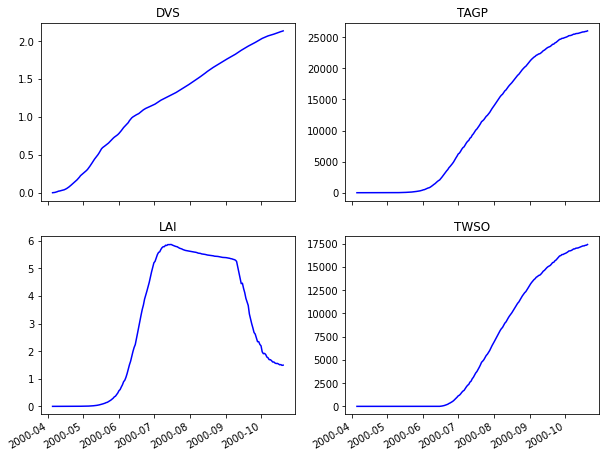

In [12]:
day = tmp.pop("day")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
for var, ax in zip(["DVS", "TAGP", "LAI", "TWSO"], axes.flatten()):
    ax.plot_date(day, tmp[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()
fig.savefig('./results/sugarbeet.png')